#Exploratory Data Analysis


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import warnings
import datetime
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Spotify/Spotify.csv')
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [4]:
df.info() #Only the 'name' column has null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [5]:
df['key'].astype('int')
df['key'].unique()

array([ 0,  1,  7,  3,  5,  4,  6, 11,  2,  8, 10,  9])

In [6]:
 df.isnull().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [7]:
df.nunique()

id                  586672
name                446474
popularity             101
duration_ms         123122
explicit                 2
artists             114030
id_artists          115062
release_date         19700
danceability          1285
energy                2571
key                     12
loudness             29196
mode                     2
speechiness           1655
acousticness          5217
instrumentalness      5402
liveness              1782
valence               1805
tempo               122706
time_signature           5
dtype: int64

The data is generally poorly correlated with each other

# Data Cleaning

In [8]:
def clean_id_artist(id_artists):
    # Remove brackets and quotes
    id_artists = id_artists.replace('[', '').replace(']', '').replace("'", '')
    return id_artists
def clean_artist(artists):
    # Remove brackets and quotes
    artists = artists.replace('[', '').replace(']', '').replace("'", '')
    return artists


df['id_artists'] = df['id_artists'].apply(clean_id_artist)

df['artists'] = df['artists'].apply(clean_artist)

df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,Uli,45tIt06XoI0Iio4LBEVpls,1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,Fernando Pessoa,14jtPCOoNZwquk5wd9DxrY,1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,Ignacio Corsini,5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,Ignacio Corsini,5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,Dick Haymes,3BiJGZsyX9sJchTqcSA7Su,1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [9]:
def extract_month(date_str):
  """Extracts the month from a date string."""
  try:
    date_obj = datetime.datetime.strptime(date_str, '%Y-%m-%d')
    return date_obj.strftime('%m')
  except ValueError:
    try:
      date_obj = datetime.datetime.strptime(date_str, '%Y')
      return '0'
    except ValueError:
      return 'Invalid date format'

def extract_year(date_str):
  """Extracts the year from a date string."""
  try:
    date_obj = datetime.datetime.strptime(date_str, '%Y-%m-%d')
    return date_obj.strftime('%Y')
  except ValueError:
    try:
      date_obj = datetime.datetime.strptime(date_str, '%Y')
      return date_obj.strftime('%Y')
    except ValueError:
      return 'Invalid date format'

df['month'] = df['release_date'].apply(extract_month)
df['year'] = df['release_date'].apply(extract_year)
df.drop('release_date', axis=1, inplace=True)
df.head(10)


,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,month,year
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,Uli,45tIt06XoI0Iio4LBEVpls,0.645,0.4450,0,...,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3,02,1922
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,Fernando Pessoa,14jtPCOoNZwquk5wd9DxrY,0.695,0.2630,0,...,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1,06,1922
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,Ignacio Corsini,5LiOoJbxVSAMkBS2fUm3X2,0.434,0.1770,1,...,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5,03,1922
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,Ignacio Corsini,5LiOoJbxVSAMkBS2fUm3X2,0.321,0.0946,7,...,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3,03,1922
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,Dick Haymes,3BiJGZsyX9sJchTqcSA7Su,0.402,0.1580,3,...,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4,0,1922
5,0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,0,178933,0,Dick Haymes,3BiJGZsyX9sJchTqcSA7Su,0.227,0.2610,5,...,1,0.0382,0.994,0.247000,0.0977,0.0539,118.891,4,0,1922
6,0Dd9ImXtAtGwsmsAD69KZT,La Butte Rouge,0,134467,0,Francis Marty,2nuMRGzeJ5jJEKlfS7rZ0W,0.510,0.3550,4,...,1,0.1240,0.965,0.000000,0.1550,0.7270,85.754,5,0,1922
7,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,Mistinguett,4AxgXfD7ISvJSTObqm4aIE,0.563,0.1840,4,...,1,0.0512,0.993,0.000016,0.3250,0.6540,133.088,3,0,1922
8,0IgI1UCz84pYeVetnl1lGP,Old Fashioned Girl,0,310073,0,Greg Fieler,5nWlsH5RDgFuRAiDeOFVmf,0.488,0.4750,0,...,0,0.0399,0.620,0.006450,0.1070,0.5440,139.952,4,0,1922
9,0JV4iqw2lSKJaHBQZ0e5zK,Martín Fierro - Remasterizado,0,181173,0,Ignacio Corsini,5LiOoJbxVSAMkBS2fUm3X2,0.548,0.0391,6,...,1,0.1530,0.996,0.933000,0.1480,0.6120,75.595,3,03,1922


In [10]:
#Look for outliers
numerical_columns = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Calculate Z-scores
z_scores = np.abs(stats.zscore(df[numerical_columns]))

# Set a threshold for Z-scores
threshold = 3

# Identify outliers
outliers = np.where(z_scores > threshold)

# Extract the outlier data points
outlier_data = df.iloc[outliers[0]]

# Display the outliers
outlier_data


,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,month,year
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,Fernando Pessoa,14jtPCOoNZwquk5wd9DxrY,0.695,0.2630,0,...,1,0.9570,0.797,0.000,0.148,0.655,102.009,1,06,1922
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,Ignacio Corsini,5LiOoJbxVSAMkBS2fUm3X2,0.321,0.0946,7,...,1,0.0504,0.995,0.918,0.104,0.397,169.980,3,03,1922
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,Ignacio Corsini,5LiOoJbxVSAMkBS2fUm3X2,0.321,0.0946,7,...,1,0.0504,0.995,0.918,0.104,0.397,169.980,3,03,1922
9,0JV4iqw2lSKJaHBQZ0e5zK,Martín Fierro - Remasterizado,0,181173,0,Ignacio Corsini,5LiOoJbxVSAMkBS2fUm3X2,0.548,0.0391,6,...,1,0.1530,0.996,0.933,0.148,0.612,75.595,3,03,1922
10,0OYGe21oScKJfanLyM7daU,Capítulo 2.8 - Banquero Anarquista,0,99100,0,Fernando Pessoa,14jtPCOoNZwquk5wd9DxrY,0.676,0.2350,11,...,0,0.9600,0.794,0.000,0.210,0.724,96.777,3,06,1922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586657,1dKxf4Ht2SsKLyXfSDJAgy,The Cutest Puppy,67,82500,0,Laureen Conrad,7vgGpuiXdNlCmc994PlMlz,0.609,0.0172,8,...,1,0.1180,0.996,0.973,0.108,0.890,68.619,4,10,2020
586660,4SMp3hkQV64IoaaKsBQoBo,Edelweiss,65,123500,0,Ludovico Sagese,1dygDSkQGQOfq1ZdChpOCs,0.465,0.0289,3,...,1,0.0430,0.996,0.959,0.136,0.448,99.873,3,02,2020
586660,4SMp3hkQV64IoaaKsBQoBo,Edelweiss,65,123500,0,Ludovico Sagese,1dygDSkQGQOfq1ZdChpOCs,0.465,0.0289,3,...,1,0.0430,0.996,0.959,0.136,0.448,99.873,3,02,2020
586665,0SjsIzJkZfDU7wlcdklEFR,John Brown's Song,66,185250,0,Gregory Oberle,4MxqhahGRT4BPz1PilXGeu,0.562,0.0331,1,...,1,0.1030,0.996,0.961,0.111,0.386,63.696,3,03,2020


In [11]:
# Remove outliers
df = df.drop(df.index[outliers[0]])
df.reset_index(drop=True, inplace=True)
df

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,month,year
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,Uli,45tIt06XoI0Iio4LBEVpls,0.645,0.445,0,...,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3,02,1922
1,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,Ignacio Corsini,5LiOoJbxVSAMkBS2fUm3X2,0.434,0.177,1,...,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5,03,1922
2,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,Dick Haymes,3BiJGZsyX9sJchTqcSA7Su,0.402,0.158,3,...,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4,0,1922
3,0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,0,178933,0,Dick Haymes,3BiJGZsyX9sJchTqcSA7Su,0.227,0.261,5,...,1,0.0382,0.994,0.247000,0.0977,0.0539,118.891,4,0,1922
4,0Dd9ImXtAtGwsmsAD69KZT,La Butte Rouge,0,134467,0,Francis Marty,2nuMRGzeJ5jJEKlfS7rZ0W,0.510,0.355,4,...,1,0.1240,0.965,0.000000,0.1550,0.7270,85.754,5,0,1922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,阿YueYue,1QLBXKM5GCpyQQSVMNZqrZ,0.560,0.518,0,...,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4,09,2020
524668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,ROLE MODEL,1dy5WNgIKQU6ezkpZs4y8z,0.765,0.663,0,...,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4,10,2020
524669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,FINNEAS,37M5pPGs6V1fchFJSgCguX,0.535,0.314,7,...,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4,09,2020
524670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"Gentle Bones, Clara Benin","4jGPdu95icCKVF31CcFKbS, 5ebPSE9YI5aLeZ1Z2gkqjn",0.696,0.615,10,...,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4,03,2021


Clustering

In [12]:
# Normalize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])
X = df[features]

Scaled heatmap

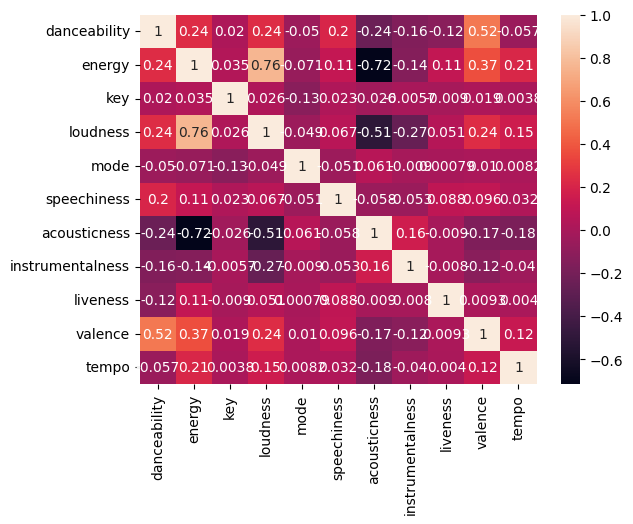

In [13]:
ax = sns.heatmap(df[features].corr(), annot=True)
plt.show()

Training

In [14]:
n_clusters = range(2,21)
ssd = []
sc = []

for n in n_clusters:
    km = KMeans(n_clusters=n, max_iter=300, n_init=10, init='k-means++', random_state=42)
    km.fit(X)
    preds = km.predict(X)
    centers = km.cluster_centers_
    ssd.append(km.inertia_)
    print('Number of Clusters = {}, Sum of Squared Distances = {}'.format(n, km.inertia_))

Number of Clusters = 2, Sum of Squared Distances = 4737634.066068625
Number of Clusters = 3, Sum of Squared Distances = 4370162.383866647
Number of Clusters = 4, Sum of Squared Distances = 4052684.211186065
Number of Clusters = 5, Sum of Squared Distances = 3742882.764554134
Number of Clusters = 6, Sum of Squared Distances = 3547710.255622448
Number of Clusters = 7, Sum of Squared Distances = 3379684.4165382776
Number of Clusters = 8, Sum of Squared Distances = 3248531.912197589
Number of Clusters = 9, Sum of Squared Distances = 3122911.2879936574
Number of Clusters = 10, Sum of Squared Distances = 3014968.011911612
Number of Clusters = 11, Sum of Squared Distances = 2924504.1479152003
Number of Clusters = 12, Sum of Squared Distances = 2857329.2428500634
Number of Clusters = 13, Sum of Squared Distances = 2784774.8369242246
Number of Clusters = 14, Sum of Squared Distances = 2734848.157501531
Number of Clusters = 15, Sum of Squared Distances = 2676020.8336026706
Number of Clusters = 1

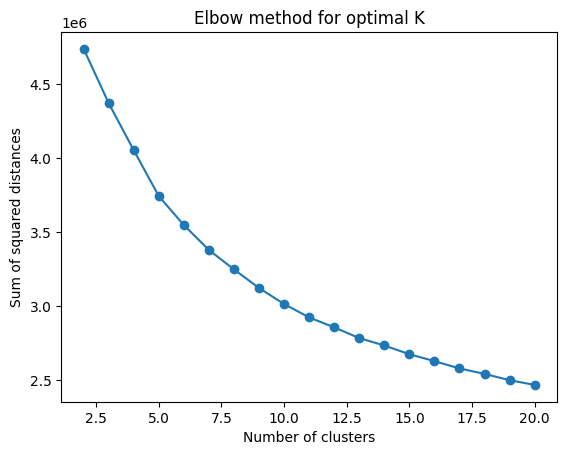

In [15]:
plt.plot(n_clusters, ssd, marker='.', markersize=12)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method for optimal K')
plt.show()

In [16]:
k=11

model = KMeans(n_clusters=k, random_state=42).fit(X)
pred = model.predict(X)

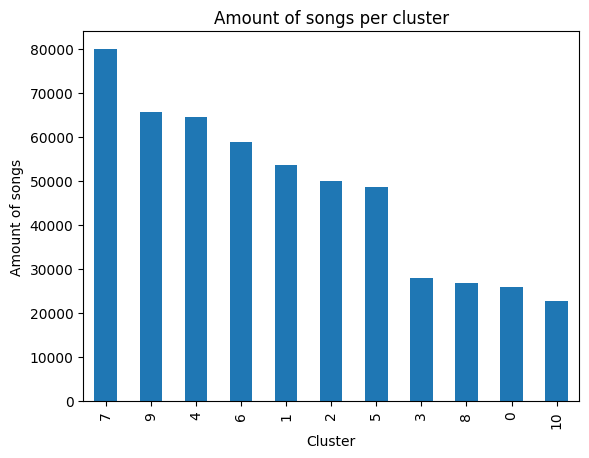

In [17]:
df['cluster'] = model.labels_

df['cluster'].value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Amount of songs')
plt.title('Amount of songs per cluster')
plt.show()

In [18]:
display(df['cluster'].value_counts())

cluster
7     79991
9     65716
4     64555
6     58805
1     53615
2     49954
5     48592
3     28002
8     26754
0     25978
10    22710
Name: count, dtype: int64

Determine the clusters

In [19]:
# Calculate cluster centroids
centroids = pd.DataFrame(model.cluster_centers_, columns=features)

# Add cluster labels to the centroids for better readability
centroids['cluster'] = range(k)

# Identify the most notable features for each cluster
notable_features = {}
for i in range(k):
    cluster_data = df[df['cluster'] == i]
    mean_values = cluster_data[features].mean()
    notable_features[i] = mean_values.sort_values(ascending=False).head(3)  # Top 3 notable features for each cluster

# Display notable features for each cluster
for cluster, features in notable_features.items():
    print(f"Cluster {cluster} notable features:\n{features}\n")

Cluster 0 notable features:
instrumentalness    2.954223
acousticness        1.319852
mode                0.061456
dtype: float64

Cluster 1 notable features:
acousticness    0.81999
mode            0.66289
valence         0.61229
dtype: float64

Cluster 2 notable features:
acousticness    0.778892
key             0.060243
liveness       -0.173748
dtype: float64

Cluster 3 notable features:
liveness    2.786295
energy      0.307361
loudness    0.170010
dtype: float64

Cluster 4 notable features:
key       0.794329
mode      0.720808
energy    0.642664
dtype: float64

Cluster 5 notable features:
tempo       1.416469
energy      0.639695
loudness    0.592352
dtype: float64

Cluster 6 notable features:
mode        0.720808
energy      0.616163
loudness    0.522009
dtype: float64

Cluster 7 notable features:
energy          0.662969
danceability    0.594199
loudness        0.553137
dtype: float64

Cluster 8 notable features:
speechiness     3.530054
danceability    0.691843
valence        

In [31]:
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,month,year,cluster
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,Uli,45tIt06XoI0Iio4LBEVpls,0.468789,-0.452663,-1.488806,...,4.764954,0.705575,2.837444,-0.271342,-1.700562,-0.503026,3,02,1922,8
1,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,Ignacio Corsini,5LiOoJbxVSAMkBS2fUm3X2,-0.827646,-1.549679,-1.204448,...,-0.262964,1.631744,-0.295790,0.162697,-0.411111,0.374397,5,03,1922,9
2,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,Dick Haymes,3BiJGZsyX9sJchTqcSA7Su,-1.024262,-1.627453,-0.635732,...,-0.416392,1.617273,0.173631,0.867123,-1.430950,-0.558999,4,0,1922,2
3,0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,0,178933,0,Dick Haymes,3BiJGZsyX9sJchTqcSA7Su,-2.099505,-1.205838,-0.067017,...,-0.426453,1.631744,0.681231,-0.650594,-1.986195,-0.021193,4,0,1922,9
4,0Dd9ImXtAtGwsmsAD69KZT,La Butte Rouge,0,134467,0,Francis Marty,2nuMRGzeJ5jJEKlfS7rZ0W,-0.360684,-0.821064,-0.351374,...,0.652575,1.547810,-0.390368,-0.242881,0.643895,-1.158407,5,0,1922,1


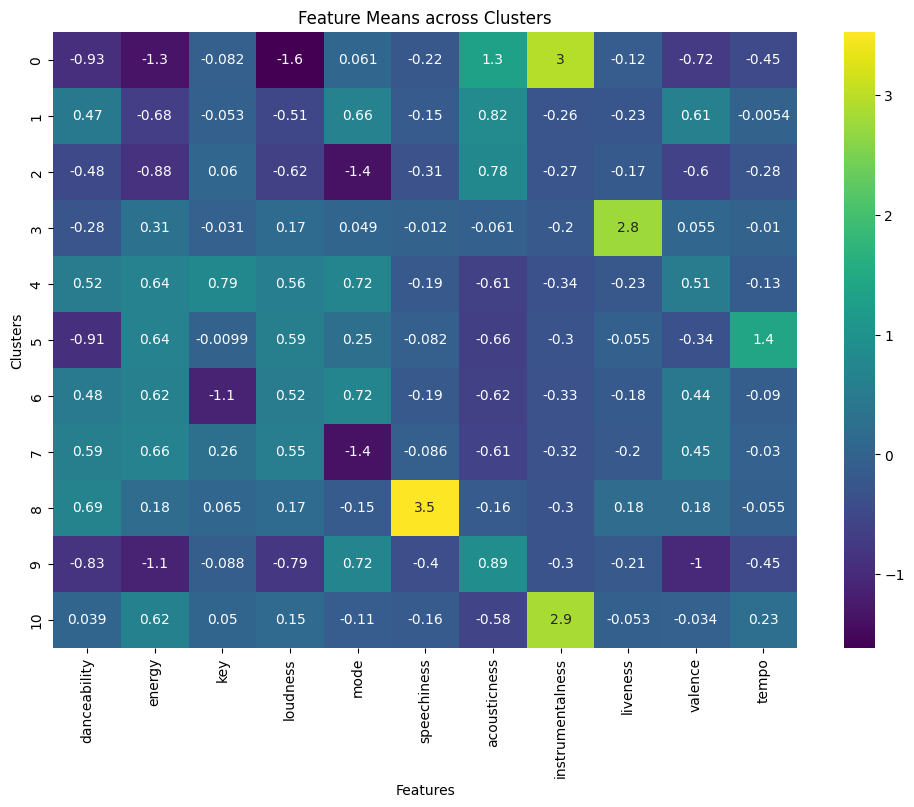

In [34]:
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Calculate the mean values for each feature within each cluster
cluster_means = df.groupby('cluster')[features].mean()

# Create a heatmap to visualize the mean values of features across clusters
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means, annot=True, cmap='viridis')
plt.title('Feature Means across Clusters')
plt.xlabel('Features')
plt.ylabel('Clusters')
plt.show()

Visualize clusters with PCA

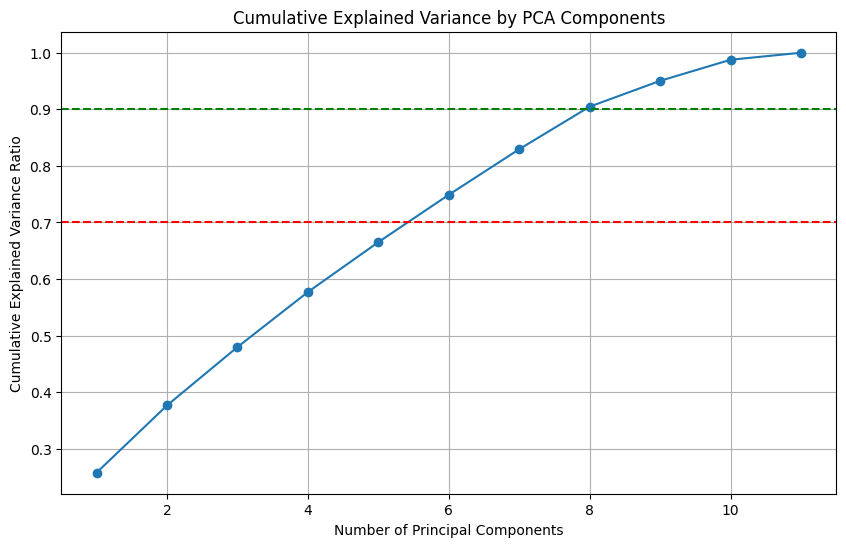

Number of components to reach 70% variance: 6
Number of components to reach 90% variance: 8


In [20]:
from sklearn.decomposition import PCA

pca = PCA(random_state=42)
songs_pca = pca.fit_transform(X)

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.axhline(y=0.7, color='r', linestyle='--')  # Line at 70% explained variance
plt.axhline(y=0.9, color='g', linestyle='--')  # Line at 90% explained variance
plt.show()

# Determine the number of components to reach 70% or 90% variance
desired_variance_70 = np.where(cumulative_explained_variance >= 0.7)[0][0] + 1
desired_variance_90 = np.where(cumulative_explained_variance >= 0.9)[0][0] + 1

print(f"Number of components to reach 70% variance: {desired_variance_70}")
print(f"Number of components to reach 90% variance: {desired_variance_90}")

In [21]:
pca = PCA(n_components=8, random_state=42)
songs_pca = pca.fit_transform(X)
pca.explained_variance_ratio_.sum()

0.9047166055478832

In [22]:
df_pca = pd.DataFrame(songs_pca, columns=['C1', 'C2', 'C3','C4','C5','C6','C7','C8'])
df_pca['cluster'] = model.labels_
df_pca.head()

,C1,C2,C3,C4,C5,C6,C7,C8,cluster
0,1.530369,-1.243705,0.230538,2.993472,1.863642,1.904473,2.469473,3.417922,8
1,3.196011,-0.360560,-1.282880,0.664221,0.420963,-0.776151,0.483091,-0.822323,9
2,3.254260,0.348971,0.865665,0.664885,-0.593671,0.273162,0.767954,-1.298400,2
3,3.225882,1.391285,-0.296364,-0.410328,0.027998,-0.386956,0.356617,0.830742,9
4,1.471623,-1.406143,-0.631047,0.682820,-0.528606,-0.314904,-0.098678,0.194805,1


In [23]:
sampled_clusters_pca = pd.DataFrame()
minor_cluster = df['cluster'].value_counts().tail(1)

for c in df_pca.cluster.unique():
    df_cluster_sampled_pca = df_pca[df_pca.cluster == c].sample(n=int(minor_cluster), random_state=42)
    sampled_clusters_pca = pd.concat([sampled_clusters_pca,df_cluster_sampled_pca], axis=0)
sampled_clusters_pca.cluster.value_counts()

cluster
8     22710
9     22710
2     22710
1     22710
0     22710
3     22710
5     22710
10    22710
7     22710
4     22710
6     22710
Name: count, dtype: int64

In [24]:
sampled_clusters_pca['A1'] = sampled_clusters_pca[['C1', 'C2', 'C3', 'C4']].mean(axis=1)
sampled_clusters_pca['A2'] = sampled_clusters_pca[['C5', 'C6', 'C7', 'C8']].mean(axis=1)
sampled_clusters_pca.head()

,C1,C2,C3,C4,C5,C6,C7,C8,cluster,A1,A2
202602,0.847830,-0.669371,-0.405971,3.718314,0.048534,-0.471954,1.952518,1.219000,8,0.872700,0.687024
128351,0.435801,-1.920019,1.734812,6.449085,0.700628,-1.614506,1.659184,2.804738,8,1.674920,0.887511
235521,-0.979299,0.060013,-0.576771,1.250439,0.494042,-0.406051,2.004588,1.814592,8,-0.061404,0.976793
452237,-1.474215,-1.494803,0.766294,2.184359,-0.319910,-0.463787,-0.590670,1.437657,8,-0.004591,0.015823
279816,-1.082335,-1.689712,0.141304,3.135981,0.149357,-0.020859,3.556520,3.781294,8,0.126310,1.866578


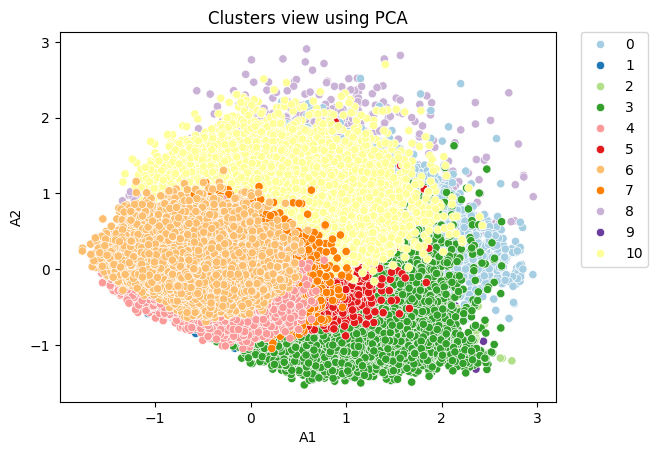

In [25]:
sns.scatterplot(x='A1', y='A2', hue='cluster', data=sampled_clusters_pca, legend="full", palette='Paired')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Clusters view using PCA')
plt.show()